In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sbn
import matplotlib.pyplot as plt

qc_dir = "/home/nnieto/Nico/Harmonization/data/qc/"
site = "AOMIC_ID1000"
runs = [1, 2, 3]
data_dir = "/home/nnieto/Nico/Harmonization/data/final_data_split/"
# Load data
Y_ID1000 = pd.read_csv(data_dir+"Y_ID1000.csv")
# Put all names in the same format
Y_ID1000['subject'] = Y_ID1000['subject'].str.replace(r'_site-ID\d+', '', regex=True)
# Put the subject name as in the QC data
Y_ID1000.rename(columns={"subject":"SubjectID"}, inplace=True)

# Load QC data
for run_number in runs:
    qc_data = pd.read_csv(qc_dir+site+"_cat12.8.1_run-"+str(run_number)+"_rois_thalamus.csv")
    qc_data = qc_data.loc[:,["SubjectID","IQR"]]
    qc_data.rename(columns={"IQR":"IQR_run"+str(run_number)}, inplace=True)
    Y_ID1000 = pd.merge(Y_ID1000, qc_data, on='SubjectID', how='left')

# Remove those subject without QC data
Y_ID1000 = Y_ID1000.dropna()


<AxesSubplot: xlabel='age', ylabel='gender'>

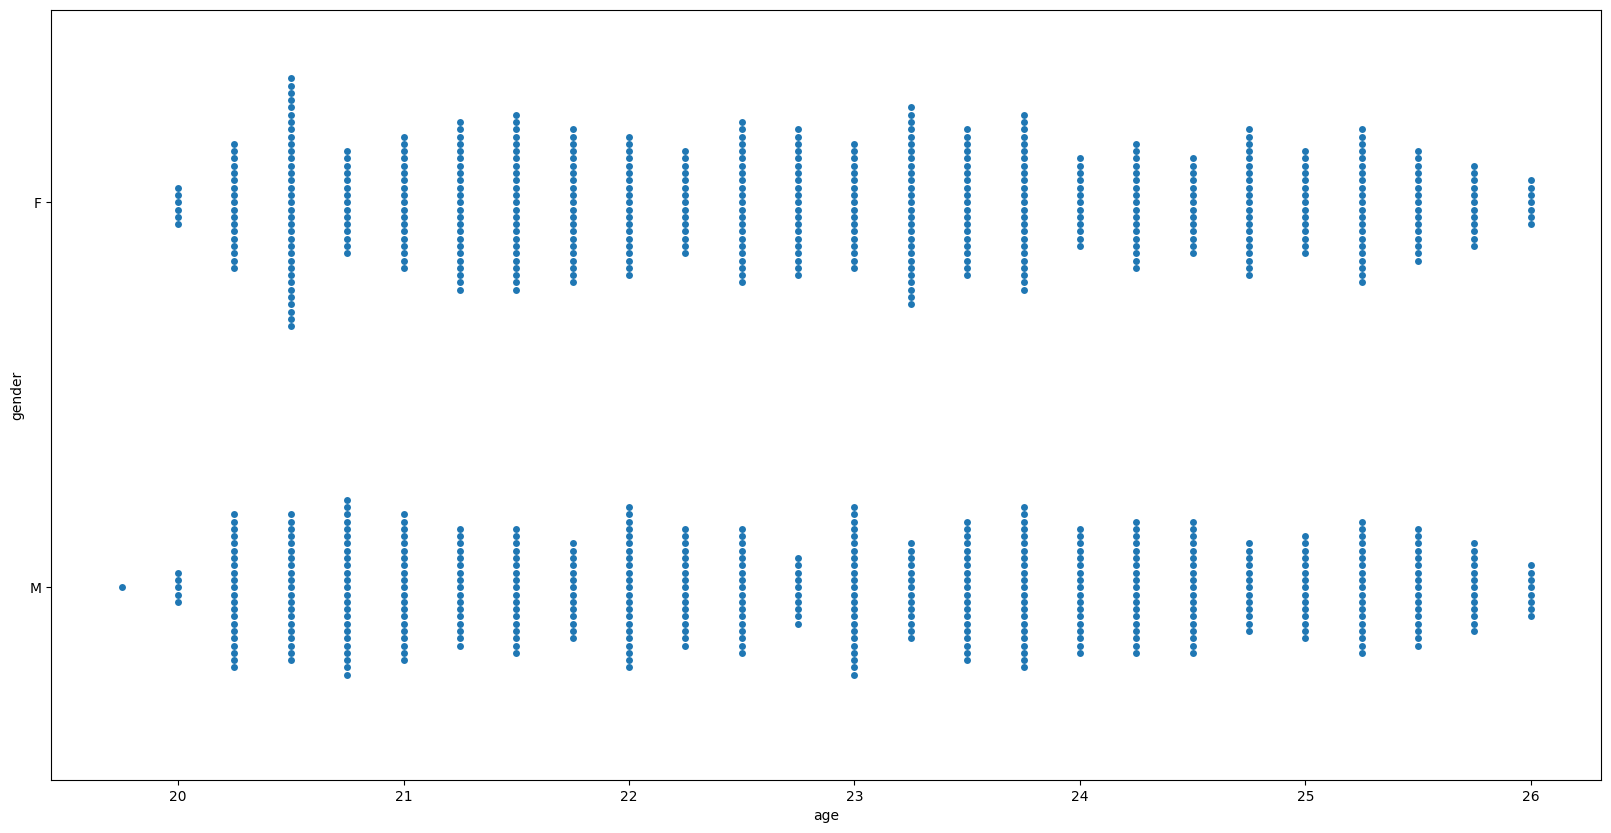

In [2]:
_, ax = plt.subplots(1, 1, figsize=[20, 10])

sbn.swarmplot(data=Y_ID1000, x="age", y="gender",ax=ax)

<AxesSubplot: xlabel='age', ylabel='gender'>

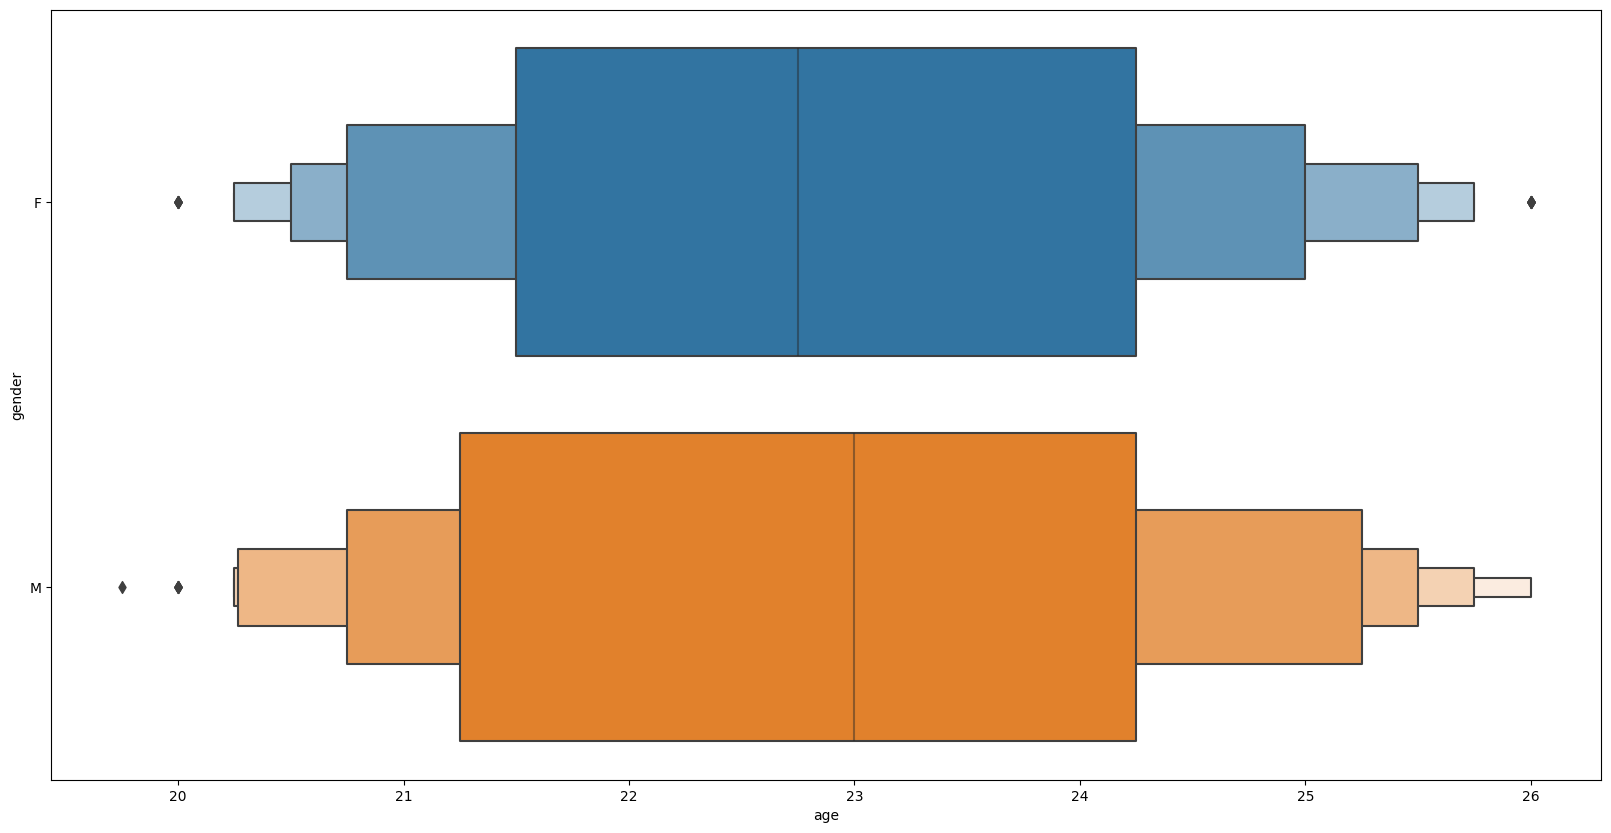

In [3]:
_, ax = plt.subplots(1, 1, figsize=[20, 10])

sbn.boxenplot(data=Y_ID1000, x="age", y="gender", ax=ax)

/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

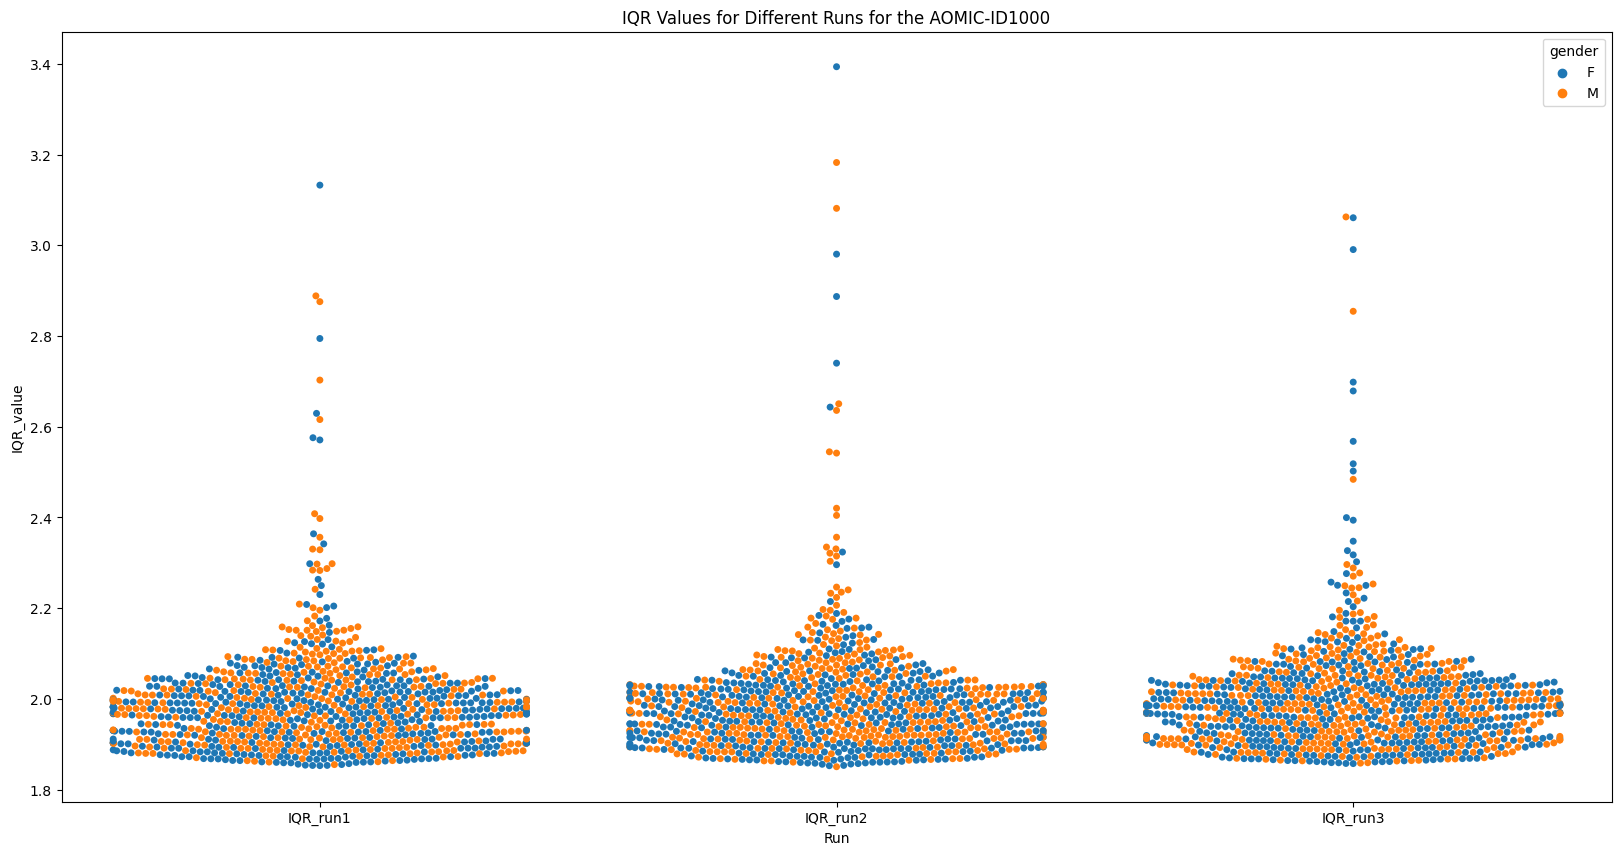

In [4]:
iqr_columns = ['IQR_run1', 'IQR_run2', 'IQR_run3']
# Reshape the DataFrame using melt
df_iqr = Y_ID1000[iqr_columns + ['gender']]  # Include 'gender' in the selection

# Reshape the DataFrame using melt
df_melted = df_iqr.melt(id_vars='gender', var_name='Run', value_name='IQR_value')


# Create the swarm plot
plt.figure(figsize=(20, 10))
sbn.swarmplot(x='Run', y='IQR_value', hue='gender', data=df_melted)
plt.title('IQR Values for Different Runs for the AOMIC-ID1000')
plt.show()


In [15]:
def print_stadistics(df):
    # Assuming df is your DataFrame
    # Calculate descriptive statistics for each run by gender
    for col in ['IQR_run1', 'IQR_run2', 'IQR_run3']:
        print(f"Statistics for {col}:")
        for gender in df['gender'].unique():
            gender_data = df[df['gender'] == gender][col]
            print(f"Gender: {gender}")
            print(f"  Mean: {gender_data.mean()}")
            print(f"  Median: {gender_data.median()}")
            print(f"  Standard Deviation: {gender_data.std()}")
            print(f"  Skewness: {gender_data.skew()}")
            print(f"  Kurtosis: {gender_data.kurtosis()}")
            print("\n")
    return

print_stadistics(Y_ID1000)



Statistics for IQR_run1:
Gender: F
  Mean: 1.9817729386892178
  Median: 1.9728
  Standard Deviation: 0.1133230504251424
  Skewness: 4.2747826498421855
  Kurtosis: 32.22143845764208


Gender: M
  Mean: 1.9990145161290322
  Median: 1.97775
  Standard Deviation: 0.11980361160922993
  Skewness: 3.1522772201400873
  Kurtosis: 17.169520535006292


Statistics for IQR_run2:
Gender: F
  Mean: 1.982691754756871
  Median: 1.9696
  Standard Deviation: 0.12605669895473012
  Skewness: 5.677132294483101
  Kurtosis: 49.713656160185


Gender: M
  Mean: 2.0045417050691245
  Median: 1.97785
  Standard Deviation: 0.1348372665157071
  Skewness: 3.853633892393466
  Kurtosis: 24.944037409351672


Statistics for IQR_run3:
Gender: F
  Mean: 1.9979610993657504
  Median: 1.9816
  Standard Deviation: 0.1272238640222617
  Skewness: 3.704858128712916
  Kurtosis: 22.398897543813394


Gender: M
  Mean: 1.999422811059908
  Median: 1.9851
  Standard Deviation: 0.11084731529249202
  Skewness: 3.5914061238567827
  Kurtos

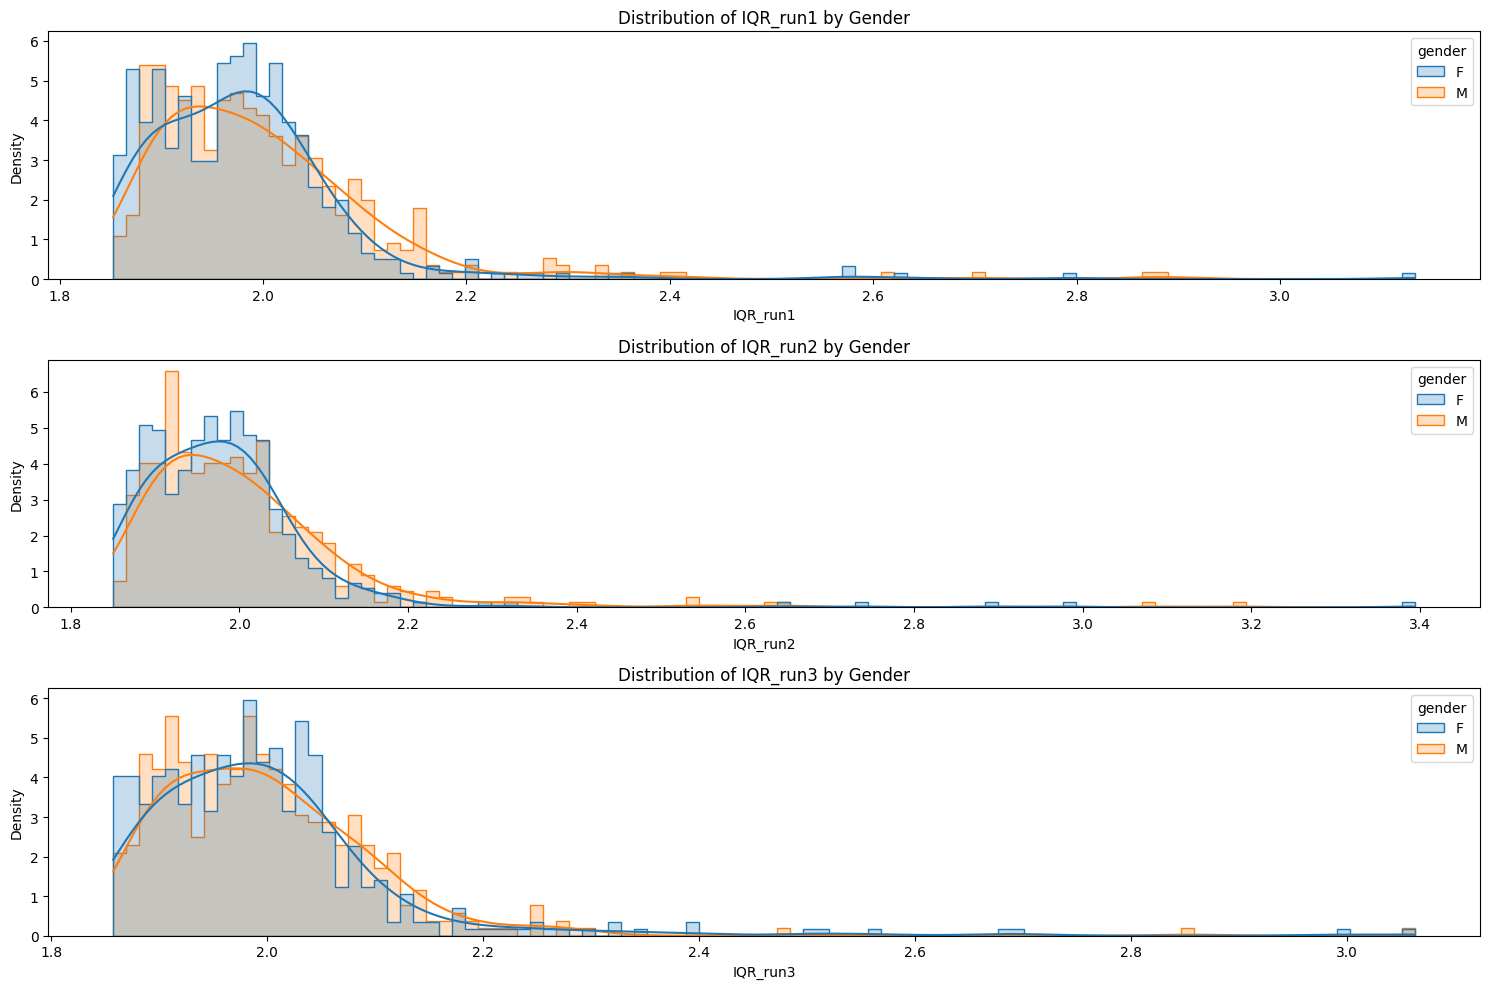

In [16]:
# Visualizing the distribution by gender
plt.figure(figsize=(15, 10))

for i, col in enumerate(['IQR_run1', 'IQR_run2', 'IQR_run3'], 1):
    plt.subplot(3, 1, i)
    sbn.histplot(Y_ID1000, x=col, hue='gender', kde=True, element='step', stat="density", common_norm=False, bins=100)
    plt.title(f'Distribution of {col} by Gender')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [12]:
# Function to analyze differences by gender
def analyze_gender_differences(df):
    results = {}
    
    for col in ['IQR_run1', 'IQR_run2', 'IQR_run3']:
        print(f"\nAnalyzing {col}:")
        male_data = df[df['gender'] == 'M'][col]
        female_data = df[df['gender'] == 'F'][col]
        
        # Step 1: Check Normality with Shapiro-Wilk Test
        male_normality_p = stats.shapiro(male_data)[1]
        female_normality_p = stats.shapiro(female_data)[1]
        normality = (male_normality_p > 0.05) and (female_normality_p > 0.05)
        print(f"  Normality - Male p-value: {male_normality_p}, Female p-value: {female_normality_p}")
        
        # Step 2: Check Homogeneity of Variances with Levene's Test
        levene_p = stats.levene(male_data, female_data)[1]
        equal_variance = levene_p > 0.05
        print(f"  Levene's test for equal variances - p-value: {levene_p}")
        
        # Step 3: Choose and Perform the Appropriate Test
        if normality:
            if equal_variance:
                # Use T-test
                stat, p_value = stats.ttest_ind(male_data, female_data, equal_var=True)
                test_used = "T-test (equal variances)"
            else:
                # Use Welch's T-test
                stat, p_value = stats.ttest_ind(male_data, female_data, equal_var=False)
                test_used = "Welch's T-test (unequal variances)"
        else:
            # Use Mann-Whitney U Test
            stat, p_value = stats.mannwhitneyu(male_data, female_data, alternative='two-sided')
            test_used = "Mann-Whitney U Test (non-normal distribution)"
        
        # Step 4: Interpret the Results
        significant = p_value < 0.05
        results[col] = {
            'test_used': test_used,
            'p_value': p_value,
            'significant': significant
        }
        print(f"  Test used: {test_used}, p-value: {p_value}, Significant: {significant}")
    
    return results

# Run the analysis
results = analyze_gender_differences(Y_ID1000)

# Print final summary
print("\nFinal Results Summary:")
for run, res in results.items():
    print(f"{run}:")
    print(f"  Test used: {res['test_used']}")
    print(f"  p-value: {res['p_value']}")
    # print(f"  Statistically Significant: {res['significant']}")



Analyzing IQR_run1:
  Normality - Male p-value: 1.0401467287299891e-24, Female p-value: 2.2387782452947415e-28
  Levene's test for equal variances - p-value: 0.1357680514659349
  Test used: Mann-Whitney U Test (non-normal distribution), p-value: 0.013764855701202878, Significant: True

Analyzing IQR_run2:
  Normality - Male p-value: 7.203391681760316e-27, Female p-value: 1.0108071220743447e-31
  Levene's test for equal variances - p-value: 0.0663112398586439
  Test used: Mann-Whitney U Test (non-normal distribution), p-value: 0.005225224654334724, Significant: True

Analyzing IQR_run3:
  Normality - Male p-value: 3.6247507784658685e-24, Female p-value: 8.400926639681539e-28
  Levene's test for equal variances - p-value: 0.6411658713282926
  Test used: Mann-Whitney U Test (non-normal distribution), p-value: 0.2685022312768579, Significant: False

Final Results Summary:
IQR_run1:
  Test used: Mann-Whitney U Test (non-normal distribution)
  p-value: 0.013764855701202878
IQR_run2:
  Test 